In [16]:
from scipy.constants import h, k as k_B
from physics.mkid import model

In [2]:
volume_multiplier = 10
nominal_skip_volume_um3 = 1870

kid = model.KID(active_metal=model.Aluminum(T_c=1.39),
                active_volume_um3=volume_multiplier * nominal_skip_volume_um3,
                inactive_metal=None,
                inactive_volume_um3=0,
                substrate=model.Substrate(T=0.12),
                phonon_trapping_factor=1,
                alpha=0.4,
                f_r=164e6,
                iQc=20e-6,
                iQi0=2e-6,
                S_TLS_1_Hz_P_c=1e-19,
                P_c=1e-13)

In [3]:
# Optical system and environment

# Optical bandwidth, in Hz
bandwidth = (170 - 130) * 1e9

# Broadband center frequency, in Hz
nu_center = 150e9

# Background absorbed power, in W
P_B = 0.080e-12

# System optical efficiency (not implemented yet)
eta = 1

# Absorbed power, in W
P_A = np.logspace(-14.9, -10.4, 1e4)

# Readout parameters

# Amplifier noise temperature, in K
T_amp = 4

# Readout power in W
P_g = 1e-13

# Derived constants
print("\\Delta = {:.0f} ueV".format(1e6 * kid.active_metal.Delta_eV))

# Gap frequency
print("\\nu_g = {:.1f} GHz".format(1e-9 * kid.active_metal.nu_gap))

# Recombination constant
print("R = {:.1f} um^3 s^-1".format(kid.active_metal.R_um3_per_s))

# Effective recombination constant
print("R_* = {:.1f} um^3 s^-1".format(kid.effective_recombination_um3_per_s))

# NEP

In [38]:
print("m_center = {:.2f}".format(kid.active_metal.quasiparticles_per_photon(nu_center)))
Gamma_A = kid.active_metal.quasiparticles_per_photon(nu_center) * P_A / (h * nu_center)
print("{:.2g} s^-1 <= Gamma_A <= {:.2g} s^-1".format(Gamma_A[0], Gamma_A[-1]))
Gamma_B = kid.active_metal.quasiparticles_per_photon(nu_center) * P_B / (h * nu_center)
print("Gamma_B = {:.2g} s^-1".format(Gamma_B))
print("Gamma_t = {:.2g} s^-1".format(kid.thermal_generation_rate))
Gamma = Gamma_A + Gamma_B + kid.thermal_generation_rate

m_center = 2.00
2.5e+07 s^-1 <= Gamma_A <= 8e+11 s^-1
Gamma_B = 1.6e+09 s^-1
Gamma_t = 3.7 s^-1


In [39]:
# Plot parameters
P_A_scale = 1e12
photon_color = 'red'
recombination_color = 'blue'
amp_color = 'gray'
TLS_color = 'brown'
device_color = 'green'
total_color = 'black'

In [40]:
photon = kid.NEP2_photon(Gamma_A=Gamma_A, Gamma_B=Gamma_B, nu=nu_center, bandwidth=bandwidth)
recombination = kid.NEP2_recombination(Gamma=Gamma, nu=nu_center)
amplifier = kid.NEP2_amp(T_amp=T_amp, P_g=P_g, Gamma=Gamma, nu=nu_center)
TLS = kid.NEP2_TLS(P_g=P_g, Gamma=Gamma, nu=nu_center)
device = photon + recombination + TLS
total = photon + recombination + amplifier + TLS

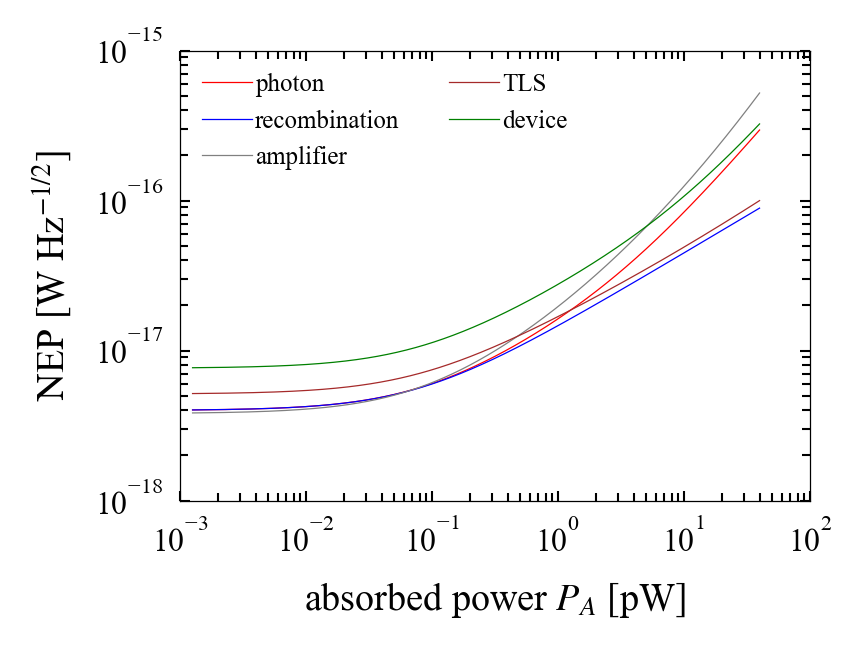

In [41]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel('NEP [W Hz$^{-1/2}$]')

ax.plot(P_A_scale * P_A,
        photon**(1/2),
        color=photon_color, label='photon')

ax.plot(P_A_scale * P_A,
        recombination**(1/2),
        color=recombination_color, label='recombination')

ax.plot(P_A_scale * P_A,
        amplifier**(1/2),
        color=amp_color, label='amplifier')

ax.plot(P_A_scale * P_A,
        TLS**(1/2),
        color=TLS_color, label='TLS')

ax.plot(P_A_scale * P_A,
        device**(1/2),
        color=device_color, label='device')

"""
ax.plot(P_A_scale * P_A,
        total**(1/2),
        color=total_color, label='total')
"""

ax.legend(loc='upper left', fontsize=6, ncol=2);

In [42]:
x_color = 'blue'
iQi_color = 'brown'
tau_qp_color = 'green'

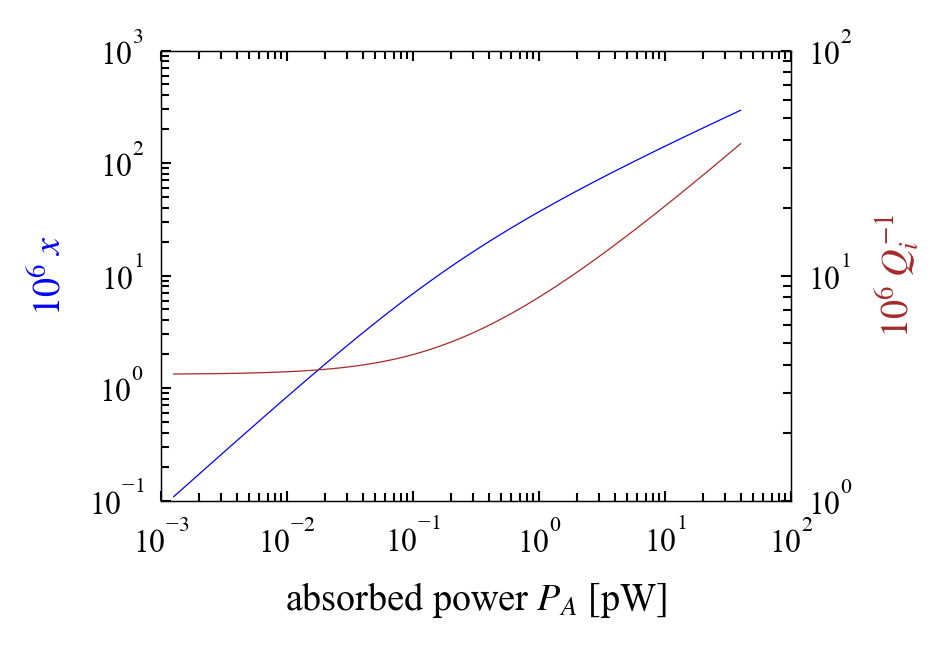

In [43]:
fig, x_ax = plt.subplots()
iQi_ax = x_ax.twinx()

x_ax.set_xscale('log')
x_ax.set_yscale('log')
iQi_ax.set_yscale('log')
x_ax.set_xlabel('absorbed power $P_A$ [pW]')
x_ax.set_ylabel('$10^6 \; x$', color=x_color)
iQi_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=iQi_color)

x_ax.plot(P_A_scale * P_A,
            1e6 * (kid.x(Gamma=Gamma) - kid.x(Gamma=Gamma_B)),
            color=x_color)

iQi_ax.plot(P_A_scale * P_A,
            1e6 * kid.iQi(Gamma=Gamma),
            color=iQi_color)

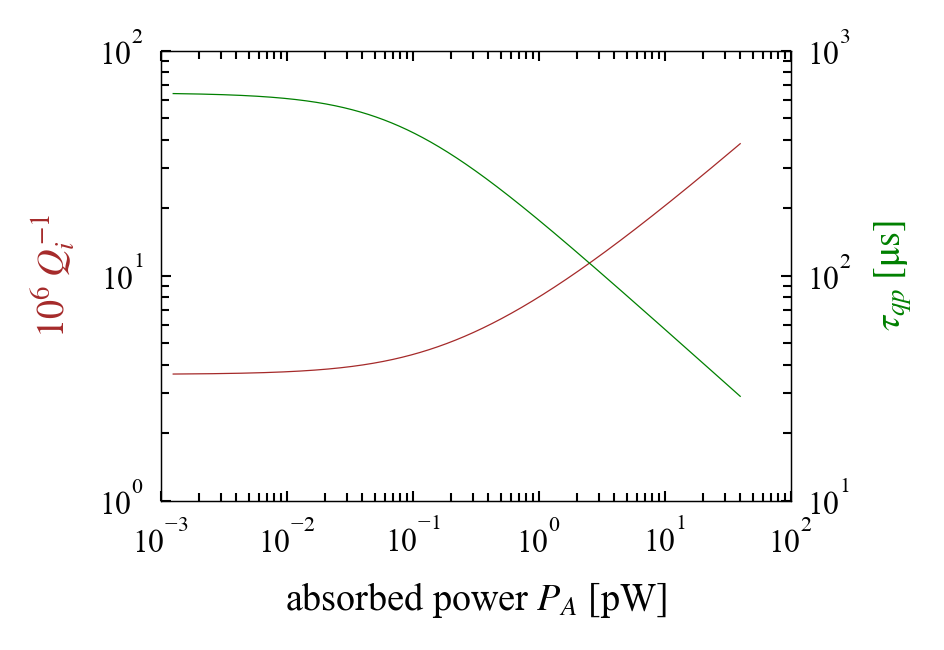

In [44]:
fig, iQi_ax = plt.subplots()
tau_qp_ax = iQi_ax.twinx()

iQi_ax.set_xscale('log')
iQi_ax.set_yscale('log')
tau_qp_ax.set_yscale('log')
iQi_ax.set_xlabel('absorbed power $P_A$ [pW]')
iQi_ax.set_ylabel('$10^6 \; Q_i^{-1}$', color=iQi_color)
tau_qp_ax.set_ylabel(r'$\tau_{qp} \; [\mathrm{\mu s}]$', color=tau_qp_color)

iQi_ax.plot(P_A_scale * P_A,
            1e6 * kid.iQi(Gamma=Gamma),
            color=iQi_color)

tau_qp_ax.plot(P_A_scale * P_A,
               1e6 * kid.tau_qp(Gamma=Gamma),
               color=tau_qp_color)


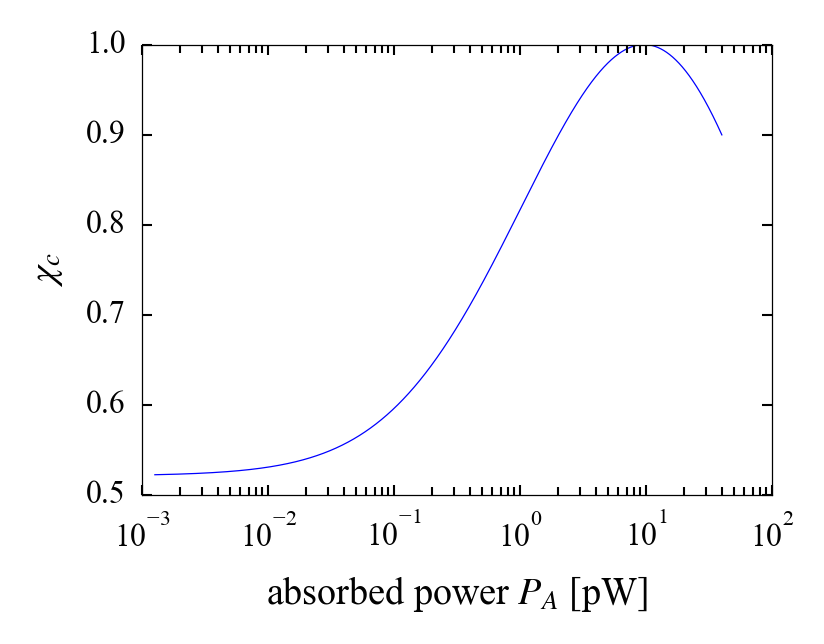

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel(r'$\chi_c$')
ax.semilogx(P_A_scale * P_A,
            kid.chi_c(kid.iQi(Gamma)))

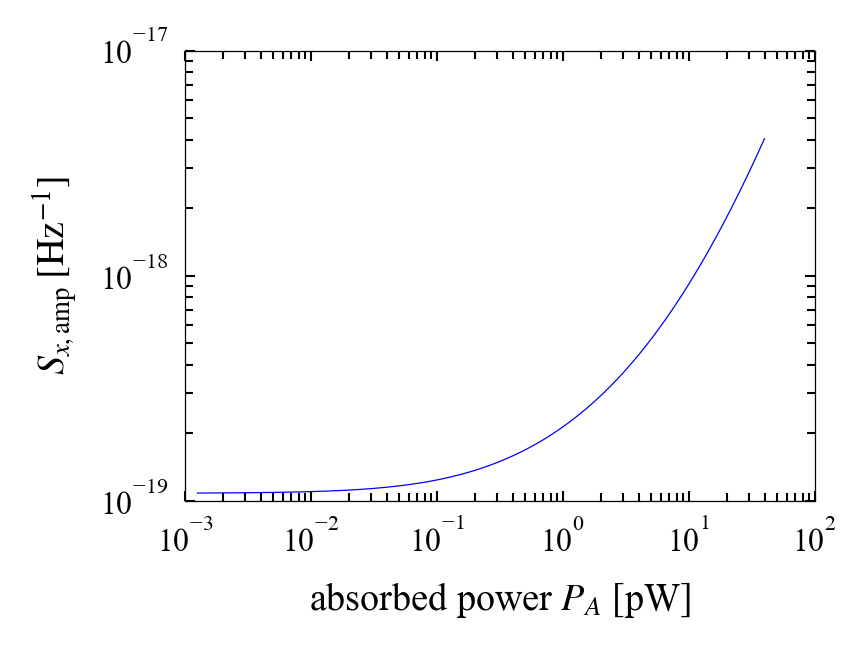

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel('absorbed power $P_A$ [pW]')
ax.set_ylabel(r'$S_{x, \mathrm{amp}} \; [\mathrm{Hz}^{-1}]$')

ax.loglog(P_A_scale * P_A,
          (k_B * T_amp / P_g) / np.abs(kid.d_S21_d_x(kid.iQi(Gamma=Gamma)))**2)

# Generation efficiency

In [21]:
nu = np.linspace(0, 4 * kid.active_metal.nu_gap, 1e3)
nu = nu[1:]

In [22]:
eta_color = 'blue'
m_color = 'green'

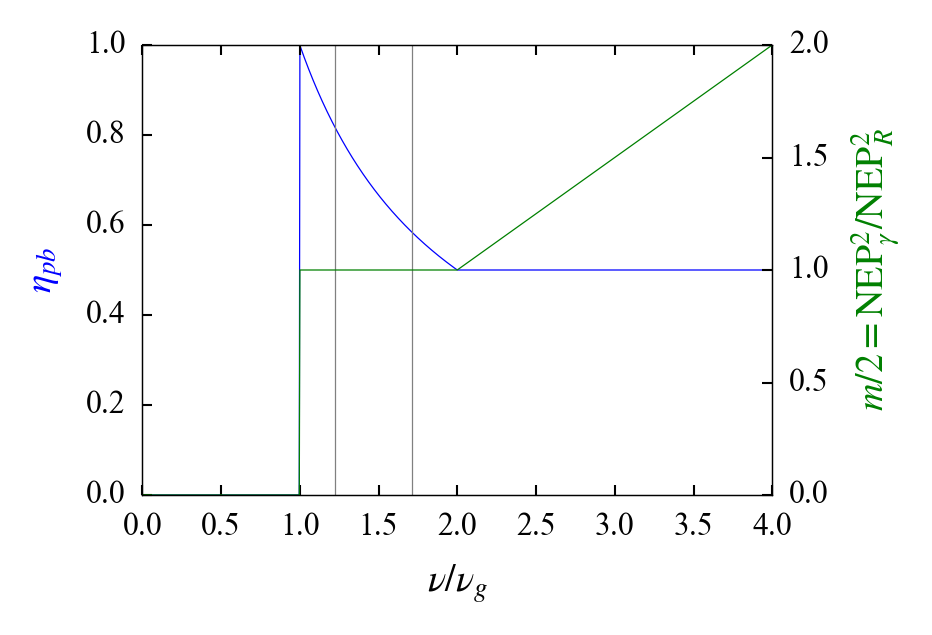

In [26]:
fig, eta_ax = plt.subplots()
m_ax = eta_ax.twinx()

eta_ax.plot(nu / kid.active_metal.nu_gap,
            [kid.active_metal.eta_pb(n) for n in nu],
            color=eta_color)
eta_ax.set_xlabel(r'$\nu / \nu_g$')
eta_ax.set_ylabel(r'$\eta_{pb}$', color=eta_color)
m_ax.plot(nu / kid.active_metal.nu_gap,
          [kid.active_metal.quasiparticles_per_photon(n) / 2 for n in nu],
          color=m_color)
m_ax.set_ylabel('$m / 2 = \mathrm{NEP}_\gamma^2 / \mathrm{NEP}_R^2$',
                color=m_color)

eta_ax.axvline(125e9 / kid.active_metal.nu_gap, color='gray')
eta_ax.axvline(175e9 / kid.active_metal.nu_gap, color='gray')